In [1]:
import torch as t
import numpy as np
import matplotlib.pyplot as plt
import open3d
from numpy import linalg as LA
import os
import h5py
import pandas as pd
from torch import nn

In [5]:
a = t.zeros(15,3,500)
b = t.zeros(15,3,500)

In [9]:
t.norm(a-b, dim=1).shape

torch.Size([15, 500])

In [ ]:
X = points(1,:);
Y = points(2,:);
Z = points(3,:);
C = zeros(3,3); % covariance matrix
C(1,1) = X*X';    C(1,2) = X*Y';    C(1,3) = X*Z';
C(2,1) = C(1,2);  C(2,2) = Y*Y';    C(2,3) = Y*Z';
C(3,1) = C(1,3);  C(3,2) = C(2,3);  C(3,3) = Z*Z';
[V,D] = eig(C);

In [37]:
def namelist(path, fltr):
    cip = []
    for root, structure, files in os.walk(path):
        for file in files:
            if fltr in file:
                cip.append(os.path.join(root, file))
    return cip

In [38]:
cip = namelist('C:/cherepashkin1/phenoseed/598','Surface.ply')

In [49]:
image = np.asarray(open3d.io.read_point_cloud(cip[0]).points)
image = image - np.mean(image,axis=0)
# image = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/1484717/1491988_Surface.ply').points)
X = image[:, 0]
Y = image[:, 1]
Z = image[:, 2]
car[0,:] = np.array([np.matmul(X, X.T), np.matmul(X, Y.T), np.matmul(X, Z.T),
        np.matmul(Y, Y.T), np.matmul(Y, Z.T), np.matmul(Z, Z.T)])

In [40]:
car = np.zeros([len(cip), 6])
for i,k in enumerate():
    image = np.asarray(open3d.io.read_point_cloud(k).points)
#     image = image - np.mean(image,axis=0)
    # image = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/1484717/1491988_Surface.ply').points)
    X = image[:, 0]
    Y = image[:, 1]
    Z = image[:, 2]
    car[i,:] = np.array([np.matmul(X, X.T), np.matmul(X, Y.T), np.matmul(X, Z.T),
            np.matmul(Y, Y.T), np.matmul(Y, Z.T), np.matmul(Z, Z.T)])

TypeError: 'int' object is not iterable

In [5]:
# var = np.zeros([len(cip), 3, 3])
car = np.zeros([len(cip), 6])
for i,k in enumerate(cip):
    image = np.asarray(open3d.io.read_point_cloud(k).points)
    image = image - np.mean(image,axis=0)
    # image = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/1484717/1491988_Surface.ply').points)
    X = image[:, 0]
    Y = image[:, 1]
    Z = image[:, 2]
    car[i,:] = np.array([np.matmul(X, X.T), np.matmul(X, Y.T), np.matmul(X, Z.T),
            np.matmul(Y, Y.T), np.matmul(Y, Z.T), np.matmul(Z, Z.T)])
    
#     C = np.zeros([3, 3])
#     C[0, 0] = np.matmul(X, X.T)
#     C[0, 1] = np.matmul(X, Y.T)
#     C[0, 2] = np.matmul(X, Z.T)
#     C[1, 0] = C[0, 1]
#     C[1, 1] = np.matmul(Y, Y.T)
#     C[1, 2] = np.matmul(Y, Z.T)
#     C[2, 0] = C[0, 2]
#     C[2, 1] = C[1, 2]
#     C[2, 2] = np.matmul(Z, Z.T)
    

#     car[i,:] = [C[0, 0], C[0, 1], C[0, 2], C[1, 1], C[0, 0], C[0, 0]]
#     _, v = LA.eig(C)
#     var[i,:,:]=v
    
#     image2 = np.matmul(image, v)

In [31]:
car.shape

(5283, 6)

In [50]:
car[0]

array([ 11682431.39148296,  -2072327.49637135, -10192441.5262221 ,
         8333248.33205532,   2867904.95892099,  29169936.10817471])

In [31]:
image.shape

(33503, 3)

In [27]:
car.shape

AttributeError: 'list' object has no attribute 'shape'

In [29]:
car.shape

(5283, 6)

In [32]:
car[0,:]

array([ 11682431.39148296,  -2072327.49637135, -10192441.5262221 ,
         8333248.33205532,   2867904.95892099,  29169936.10817471])

In [51]:
C2 = np.array([[car[0,0], car[0,1], car[0,2]],
      [car[0,1], car[0,3], car[0,4]],
      [car[0,2], car[0,4], car[0,5]]])

In [52]:
w, v = LA.eig(C2)

In [53]:
w

array([34319243.0719485 ,  6626028.48642578,  8240344.27333869])

In [54]:
v

array([[ 0.41700143, -0.82275715,  0.38623888],
       [-0.13249349, -0.47543578, -0.86971621],
       [-0.89919702, -0.31149877,  0.30726737]])

In [56]:
w2, v2 = LA.eig(v)

In [57]:
v2

array([[ 0.66042187+0.j        ,  0.66042187-0.j        ,
        -0.35733163+0.j        ],
       [-0.22260684-0.33452735j, -0.22260684+0.33452735j,
        -0.82284585+0.j        ],
       [-0.1195372 +0.62296987j, -0.1195372 -0.62296987j,
        -0.44185836+0.j        ]])

In [36]:
v

array([[ 0.62223975,  0.7771141 ,  0.09440003],
       [ 0.2129065 , -0.05195336, -0.97569036],
       [ 0.75331834, -0.6272117 ,  0.19778009]])

In [41]:
C2

array([[5.04089976e+08, 1.64563652e+08, 5.75078730e+08],
       [1.64563652e+08, 6.47246460e+07, 2.00929929e+08],
       [5.75078730e+08, 2.00929929e+08, 7.24817978e+08]])

In [39]:
type(C2)

list

In [42]:
w, v = LA.eig(C2/C2[0,0])

In [43]:
w

array([2.4928484 , 0.0574104 , 0.01601441])

In [44]:
v

array([[ 0.62223975,  0.7771141 ,  0.09440003],
       [ 0.2129065 , -0.05195336, -0.97569036],
       [ 0.75331834, -0.6272117 ,  0.19778009]])

In [34]:
print(w,v)

[1.25661989e+09 2.89400057e+07 8.07270438e+06] [[ 0.62223975  0.7771141   0.09440003]
 [ 0.2129065  -0.05195336 -0.97569036]
 [ 0.75331834 -0.6272117   0.19778009]]


In [21]:
var.shape

(5283, 3, 3)

In [ ]:
np.savetxt(var, delimite)

In [23]:
v

array([[-0.74466816, -0.64330328,  0.17784887],
       [-0.23069583, -0.00195767, -0.97302395],
       [-0.62629767,  0.76560894,  0.14694957]])

In [22]:
var[0,:,:]

array([[ 0.62223975,  0.7771141 ,  0.09440003],
       [ 0.2129065 , -0.05195336, -0.97569036],
       [ 0.75331834, -0.6272117 ,  0.19778009]])

In [8]:
w

array([1.25661989e+09, 2.89400057e+07, 8.07270438e+06])

In [9]:
v

array([[ 0.62223975,  0.7771141 ,  0.09440003],
       [ 0.2129065 , -0.05195336, -0.97569036],
       [ 0.75331834, -0.6272117 ,  0.19778009]])

In [25]:
with h5py.File('C:/circles/finetune_test/csv/canonical_view_rotations_598.h5', 'w') as f:
    f.create_dataset('dataset', data=var)

In [45]:
with h5py.File('C:/circles/finetune_test/csv/canonical_view_moments_598.h5', 'w') as f:
    f.create_dataset('dataset', data=car)

In [10]:
car.shape

(5283, 6)

In [11]:
car[0]

array([ 11682431.39148296,  -2072327.49637135, -10192441.5262221 ,
         8333248.33205532,   2867904.95892099,  29169936.10817471])

In [13]:
def pose6tomat(a):
    return(
            [[a[0], a[1], a[2]],
            [a[1], a[3], a[4]],
            [a[2], a[4], a[5]]])

In [19]:
_, v = LA.eig(pose6tomat(car[0,:])/car[0,0])

In [20]:
_, v = LA.eig(pose6tomat(car[0,:]))

In [21]:
v

array([[ 0.41700143, -0.82275715,  0.38623888],
       [-0.13249349, -0.47543578, -0.86971621],
       [-0.89919702, -0.31149877,  0.30726737]])

In [16]:
v

array([[ 0.41700143, -0.82275715,  0.38623888],
       [-0.13249349, -0.47543578, -0.86971621],
       [-0.89919702, -0.31149877,  0.30726737]])

In [18]:
v*pose6tomat(car[0,:])

array([[ 4871590.64627985,  1705022.27264314, -3936717.16333348],
       [  274569.9019324 , -3961924.41850326, -2494263.44565524],
       [ 9165013.03664595,  -893348.87415162,  8962969.51022606]])

In [ ]:
v = np.

In [ ]:
for i in range(car.shape[0]):
    _, v[i,:,:] = LA.eig(pose6tomat(car[i,:]))

In [22]:
df = pd.read_csv('C:/circles/finetune_test/csv/598frame.csv')

In [23]:
df

,index,file_name,zero_angle,x_cms,y_cms,z_cms,delta_x,delta_y,moment0,moment1,moment2,moment3,moment4,moment5
0,0,598csv/1484717/1491988,8.0,129.831987,43.936533,154.317130,0.000000,0.000000,504089976.0,164563652.0,575078730.0,64724646.0,200929929.0,724817978.0
1,1,598csv/1484717/1491989,9.0,119.950786,48.513970,141.181489,0.040641,0.000000,428386811.0,167247653.0,479568284.0,74638238.0,199349082.0,609253694.0
2,2,598csv/1484717/1491990,8.0,123.014476,47.128630,155.613687,0.051783,0.516619,363275825.0,136293591.0,446703489.0,56699590.0,176090923.0,592715504.0
3,3,598csv/1484717/1491991,5.0,120.352368,42.278210,136.717018,0.032078,0.516619,381880431.0,128225058.0,412001326.0,50659849.0,151043672.0,500506132.0
4,4,598csv/1484717/1491992,11.0,120.963969,52.290549,139.462856,0.007131,0.688826,395257806.0,165420434.0,442680482.0,80723765.0,199558581.0,543286441.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,598csv/1484760/1500857,10.0,121.881008,24.875571,128.604963,-5.848818,0.516619,435057172.0,86812440.0,460315264.0,23001555.0,91717537.0,515400941.0
5279,5279,598csv/1484760/1500858,22.0,138.268651,47.324900,118.120206,-5.682811,0.516619,521235084.0,171184215.0,419739092.0,64739111.0,145262026.0,378174238.0
5280,5280,598csv/1484760/1500859,21.0,140.535355,24.351695,137.298298,-5.663254,0.516619,620853856.0,102768458.0,568026943.0,23532224.0,101179273.0,588455777.0
5281,5281,598csv/1484760/1500860,21.0,132.135006,52.008363,115.020311,-5.555135,0.516619,661442177.0,249010683.0,530651160.0,110415531.0,211167589.0,500456320.0


In [51]:
cip[-1]

'C:/cherepashkin1/phenoseed/598\\1484760\\1500861_Surface.ply'

In [52]:
df.iloc(0,0)

TypeError: __call__() takes from 1 to 2 positional arguments but 3 were given

In [25]:
car.shape

(5283, 6)

In [26]:
len(df)

5283

In [27]:
for i in range(6):
    df.insert(14+i, "mom"+str(i), car[:,i])

In [28]:
df

,index,file_name,zero_angle,x_cms,y_cms,z_cms,delta_x,delta_y,moment0,moment1,moment2,moment3,moment4,moment5,mom0,mom1,mom2,mom3,mom4,mom5
0,0,598csv/1484717/1491988,8.0,129.831987,43.936533,154.317130,0.000000,0.000000,504089976.0,164563652.0,575078730.0,64724646.0,200929929.0,724817978.0,1.168243e+07,-2.072327e+06,-1.019244e+07,8.333248e+06,2.867905e+06,2.916994e+07
1,1,598csv/1484717/1491989,9.0,119.950786,48.513970,141.181489,0.040641,0.000000,428386811.0,167247653.0,479568284.0,74638238.0,199349082.0,609253694.0,1.177674e+07,-1.249855e+06,-1.077973e+07,6.489597e+06,1.028339e+06,3.211648e+07
2,2,598csv/1484717/1491990,8.0,123.014476,47.128630,155.613687,0.051783,0.516619,363275825.0,136293591.0,446703489.0,56699590.0,176090923.0,592715504.0,6.813210e+06,-2.724059e+05,-4.222803e+06,4.379176e+06,3.334522e+06,2.229237e+07
3,3,598csv/1484717/1491991,5.0,120.352368,42.278210,136.717018,0.032078,0.516619,381880431.0,128225058.0,412001326.0,50659849.0,151043672.0,500506132.0,1.155030e+07,-1.867066e+06,-8.683638e+06,4.960190e+06,3.262556e+06,2.261945e+07
4,4,598csv/1484717/1491992,11.0,120.963969,52.290549,139.462856,0.007131,0.688826,395257806.0,165420434.0,442680482.0,80723765.0,199558581.0,543286441.0,7.429177e+06,-2.230910e+06,-4.458354e+06,8.251103e+06,6.268502e+06,2.776715e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,598csv/1484760/1500857,10.0,121.881008,24.875571,128.604963,-5.848818,0.516619,435057172.0,86812440.0,460315264.0,23001555.0,91717537.0,515400941.0,8.852938e+06,-1.746448e+05,1.059811e+07,5.247736e+06,-6.846828e+04,4.087370e+07
5279,5279,598csv/1484760/1500858,22.0,138.268651,47.324900,118.120206,-5.682811,0.516619,521235084.0,171184215.0,419739092.0,64739111.0,145262026.0,378174238.0,2.024213e+07,-2.895143e+05,-8.249394e+06,6.049184e+06,-1.224629e+06,1.255204e+07
5280,5280,598csv/1484760/1500859,21.0,140.535355,24.351695,137.298298,-5.663254,0.516619,620853856.0,102768458.0,568026943.0,23532224.0,101179273.0,588455777.0,2.424024e+07,-6.115976e+05,-1.484443e+07,5.618728e+06,1.804479e+05,1.901012e+07
5281,5281,598csv/1484760/1500860,21.0,132.135006,52.008363,115.020311,-5.555135,0.516619,661442177.0,249010683.0,530651160.0,110415531.0,211167589.0,500456320.0,3.305156e+07,1.676018e+06,-1.634760e+07,1.306456e+07,-4.131224e+06,2.430720e+07


In [29]:
df.to_csv('C:/circles/finetune_test/csv/598frame3.csv', index=False)

In [58]:
yn = np.genfromtxt('C:/cherepashkin1/phenoseed_csv/Y_N_500.csv', delimiter=',')

In [59]:
yn.shape

(18000, 441)

In [60]:
yn2 = yn[:500,:]

In [61]:
yn2.shape

(500, 441)

In [62]:
with h5py.File('C:/circles/finetune_test/csv/y_n_fibo_500.h5', 'w') as f:
    f.create_dataset('dataset', data=yn2)

In [63]:
with h5py.File('C:/circles/finetune_test/csv/y_n_fibo_500_whole.h5', 'w') as f:
    f.create_dataset('dataset', data=yn)

In [64]:
bx = np.genfromtxt('C:/cherepashkin1/phenoseed_csv/bX_500.csv', delimiter=',')

In [65]:
bx.shape

(72, 500)

In [66]:
bx2 = bx[:2,:]

In [67]:
with h5py.File('C:/circles/finetune_test/csv/bX_fibo_500.h5', 'w') as f:
    f.create_dataset('dataset', data=bx2)
with h5py.File('C:/circles/finetune_test/csv/bX_fibo_500_whole.h5', 'w') as f:
    f.create_dataset('dataset', data=bx)

In [68]:
'replace'.replace('b', 'w')

'replace'

In [70]:
name = ['C:/circles/finetune_test/csv/bX_fibo_500.h5', 'C:/circles/finetune_test/csv/bX_fibo_500_whole.h5']

In [75]:
a, b = [np.array(h5py.File(nm,'r').get('dataset')) for nm in name]

In [72]:
a.shape

(2, 500)

In [73]:
b.shape

(72, 500)

In [74]:
type(a)

numpy.ndarray

In [76]:
os.path.isfile('C:/cherepashkin/phenoseed/598/1484750/1499544/rotation_000.tif')


False

In [77]:
os.path.isfile('C:/cherepashkin1/phenoseed/598/1484750/1499544/rotation_000.tif')

True

In [78]:
car.shape

(5283, 6)

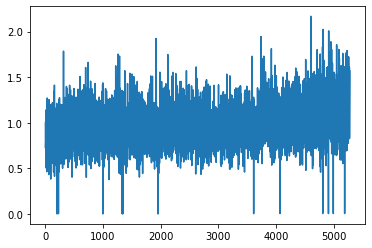

In [93]:
plt.plot(car[:,0]/car[0,0])

In [81]:
car[0,:]/car[0,0]

array([1.        , 0.3264569 , 1.14082556, 0.12839899, 0.39859933,
       1.43787421])

In [83]:
['moment'+str(i) for i in range(6)]

['moment0', 'moment1', 'moment2', 'moment3', 'moment4', 'moment5']

In [86]:
np2 = df[['moment'+str(i) for i in range(6)]].to_numpy()

In [87]:
np2.shape

(5283, 6)

[181796.0, 8380.0, 180456.0, 485.0, 8280.0, 179216.0]

In [89]:
[np.min(np2[:,i]) for i in range(6)], [np.max(np2[:,i]) for i in range(6)]

[1092664137.0,
 412208695.0,
 945992259.0,
 219139867.0,
 409185869.0,
 1138649978.0]

In [92]:
np.array([np.min(np2, axis=0), np.max(np2, axis=0), np.mean(np2, axis=0), np.std(np2, axis=0)])

array([[1.81796000e+05, 8.38000000e+03, 1.80456000e+05, 4.85000000e+02,
        8.28000000e+03, 1.79216000e+05],
       [1.09266414e+09, 4.12208695e+08, 9.45992259e+08, 2.19139867e+08,
        4.09185869e+08, 1.13864998e+09],
       [4.92878203e+08, 1.77985827e+08, 5.16430108e+08, 7.73298742e+07,
        1.97923013e+08, 6.00248041e+08],
       [1.12012657e+08, 4.58379949e+07, 1.01237312e+08, 2.79333473e+07,
        5.55612249e+07, 1.52860265e+08]])

In [92]:
np.array([np.min(np2[0,], axis=0), np.max(np2, axis=0), np.mean(np2, axis=0), np.std(np2, axis=0)])

array([[1.81796000e+05, 8.38000000e+03, 1.80456000e+05, 4.85000000e+02,
        8.28000000e+03, 1.79216000e+05],
       [1.09266414e+09, 4.12208695e+08, 9.45992259e+08, 2.19139867e+08,
        4.09185869e+08, 1.13864998e+09],
       [4.92878203e+08, 1.77985827e+08, 5.16430108e+08, 7.73298742e+07,
        1.97923013e+08, 6.00248041e+08],
       [1.12012657e+08, 4.58379949e+07, 1.01237312e+08, 2.79333473e+07,
        5.55612249e+07, 1.52860265e+08]])

In [ ]:
t.Tensor(targets_df['targets'].values)

In [94]:
car[0,:]

array([5.04089976e+08, 1.64563652e+08, 5.75078730e+08, 6.47246460e+07,
       2.00929929e+08, 7.24817978e+08])

In [105]:
np3 = df.loc[[0, 10, 20], ['moment'+str(i) for i in range(6)]]

In [106]:
np3

,moment0,moment1,moment2,moment3,moment4,moment5
0,504089976.0,164563652.0,575078730.0,64724646.0,200929929.0,724817978.0
10,513096571.0,180638073.0,644310216.0,73127615.0,232623649.0,857077075.0
20,462458020.0,171604598.0,530715587.0,73133743.0,209328662.0,663859425.0


In [102]:
type(df)

pandas.core.frame.DataFrame

In [100]:
df.loc[[0, 10, 20], 

TypeError: unhashable type: 'list'

In [108]:
df.loc[0,:]

index                              0
file_name     598csv/1484717/1491988
zero_angle                       8.0
x_cms                     129.831987
y_cms                      43.936533
z_cms                      154.31713
delta_x                          0.0
delta_y                          0.0
moment0                  504089976.0
moment1                  164563652.0
moment2                  575078730.0
moment3                   64724646.0
moment4                  200929929.0
moment5                  724817978.0
Name: 0, dtype: object

In [109]:
a, b = t.zeros(2,6), t.zeros(2, 6)

In [112]:
(a - b)**2

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])

In [113]:
t.sum((a - b)**2, axis=0)

tensor([0., 0., 0., 0., 0., 0.])

In [110]:
t.sqrt(t.sum((a - b)**2))

tensor(0.)

In [114]:
a, b, c = [0.0]*3

In [115]:
a

0.0

In [122]:
loss_fn=nn.MSELoss(reduction='mean')

In [123]:
inpt = t.randn(3, 5, requires_grad=True)
target = t.randn(3, 5)

In [124]:
loss_fn(inpt, target)

tensor(1.1905, grad_fn=<MseLossBackward0>)

In [125]:
a = np.array([[500, 1000, 2000, 4000],
     [9.28, 14.45, 21.6, 31.8]])

In [128]:
9.28*12

111.35999999999999

In [126]:
a.shape

(2, 4)

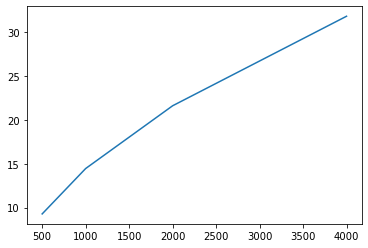

In [127]:
plt.plot(a[0,:], a[1,:])

In [30]:
car[0,:]

array([ 11682431.39148296,  -2072327.49637135, -10192441.5262221 ,
         8333248.33205532,   2867904.95892099,  29169936.10817471])